# Importing Libraries

In [75]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Collection/Loading and Processing 

In [76]:
data = pd.read_csv(r"C:\Users\HP\Documents\Internship\Titanic-Dataset.csv")

In [77]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
data.shape

(891, 12)

In [79]:
data.drop(columns = ["PassengerId","Name","Cabin","Ticket"],inplace=True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [81]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# Filling Null Values

In [82]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12384\948062835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(),inplace=True)


In [83]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12384\2004072386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0],inplace = True)


In [84]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Merging Two Columns 

In [85]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

In [86]:
data["FamilySize"].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [87]:
data.drop(columns = ["SibSp","Parch"],inplace=True)

In [88]:
data.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


# Anaylizing / Viusalization

In [89]:
data.describe()

,Survived,Pclass,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,1.904602
std,0.486592,0.836071,13.002015,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000
50%,0.000000,3.000000,29.699118,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


In [90]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_12384\2101715398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =data,y = "Survived",palette = "tab20")


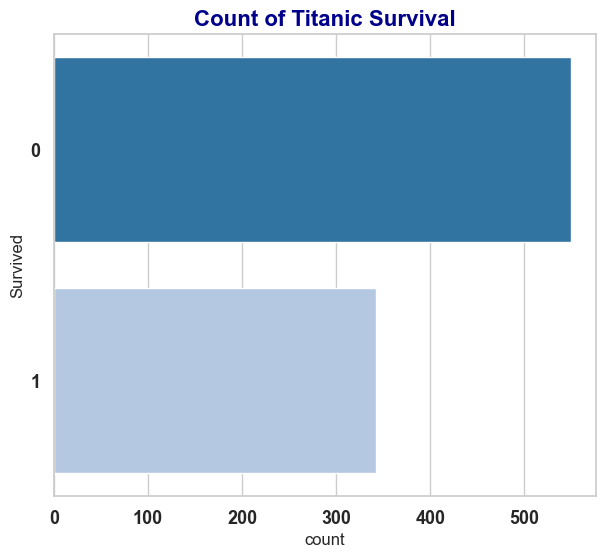

In [332]:
plt.figure(figsize=(7,6))
sns.countplot(data =data,y = "Survived",palette = "tab20")
plt.title('Count of Titanic Survival',fontsize = 16 , fontweight = 'bold',color = "DARKBLUE")
plt.yticks(fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.show()

In [91]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

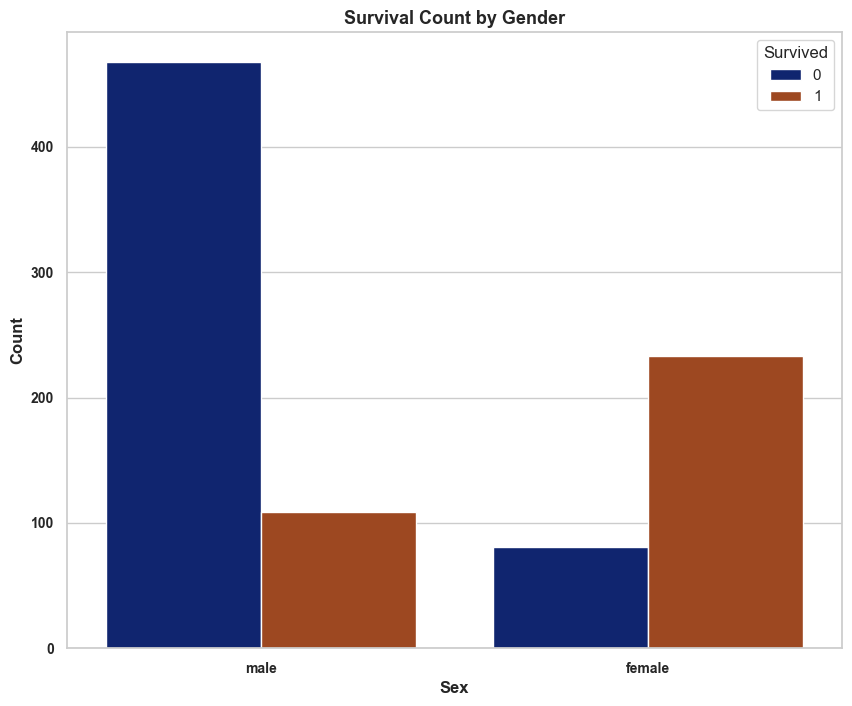

In [287]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10,8))
sns.countplot(x = 'Sex' , hue = "Survived",data = data,palette='dark')
plt.title("Survival Count by Gender", fontsize = 13, fontweight ='bold')
plt.xlabel("Sex",fontsize = 12 , fontweight='bold')
plt.ylabel("Count",fontsize = 12 , fontweight='bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

In [303]:
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

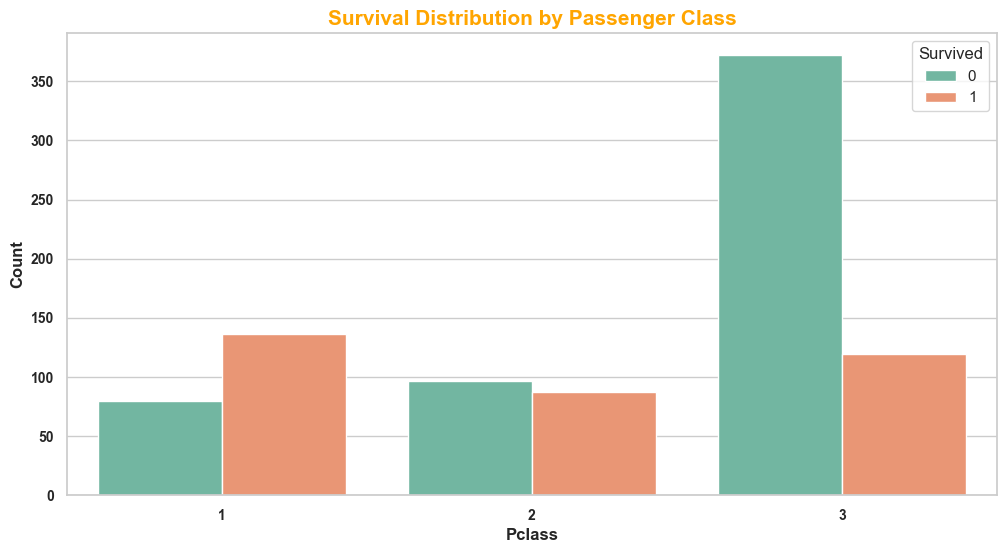

In [302]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Pclass' , hue = "Survived",data = data, palette= "Set2")
plt.title("Survival Distribution by Passenger Class", fontsize = 15, fontweight ='bold',color = 'orange')
plt.xlabel("Pclass",fontsize = 12 , fontweight='bold')
plt.ylabel("Count",fontsize = 12 , fontweight='bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

In [258]:
data["Age"].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

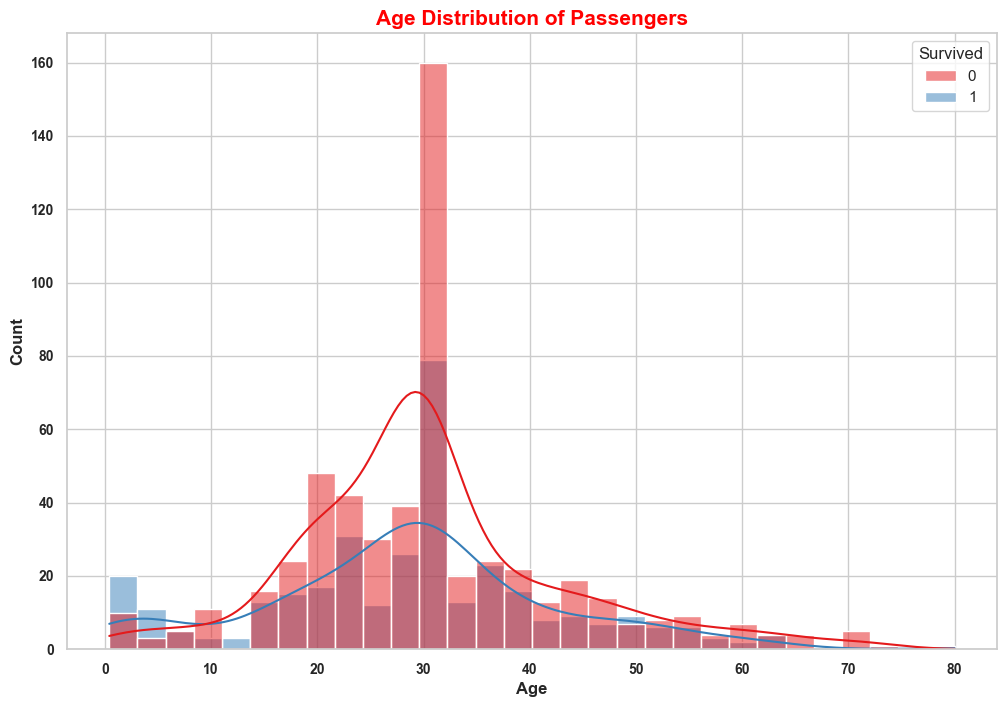

In [309]:
plt.figure(figsize=(12,8))
sns.histplot(data = data, x = "Age",hue = "Survived",bins = 30 ,kde = True,palette= "Set1")
plt.title("Age Distribution of Passengers", fontsize = 15, fontweight ='bold',color = 'Red')
plt.xlabel("Age",fontsize = 12 , fontweight='bold')
plt.ylabel("Count",fontsize = 12 , fontweight='bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

In [234]:
data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_12384\512783713.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x = 'Embarked' , hue = "Survived",data = data, color = "red")


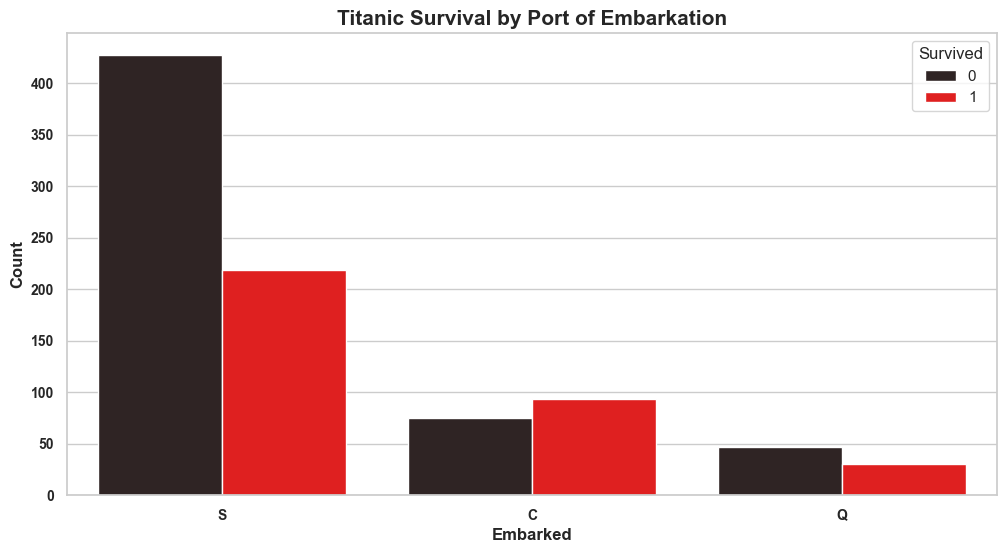

In [311]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Embarked' , hue = "Survived",data = data, color = "red")
plt.title("Titanic Survival by Port of Embarkation", fontsize = 15, fontweight ='bold')
plt.xlabel("Embarked",fontsize = 12 , fontweight='bold')
plt.ylabel("Count",fontsize = 12 , fontweight='bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

In [312]:
data["FamilySize"].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

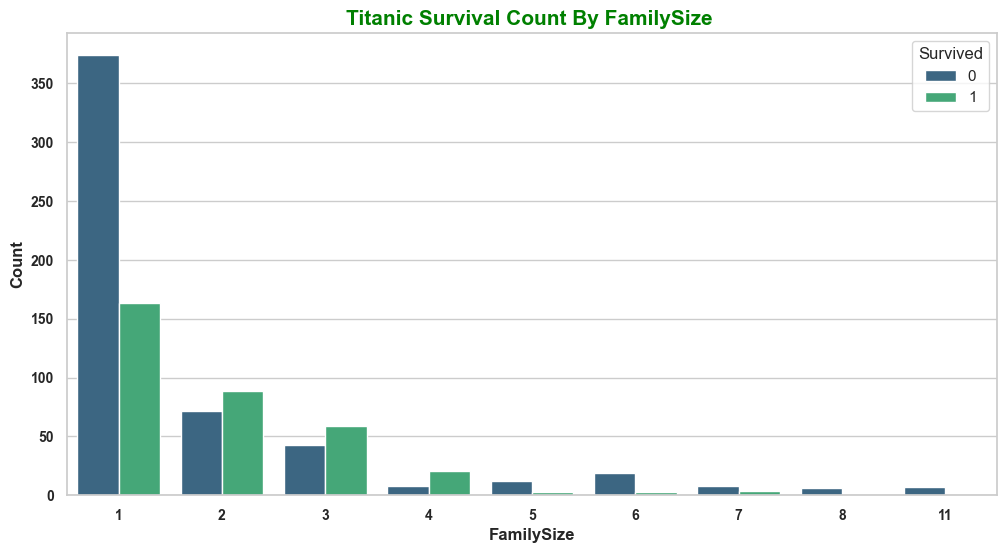

In [321]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'FamilySize' , hue = "Survived",data = data,palette='viridis')
plt.title("Titanic Survival Count By FamilySize ", fontsize = 15, fontweight ='bold',color="Green")
plt.xlabel("FamilySize",fontsize = 12 , fontweight='bold')
plt.ylabel("Count",fontsize = 12 , fontweight='bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

# Encoding and Scaling 

In [97]:
num = data.loc[: ,['Pclass','Age','Fare','FamilySize']]
num

,Pclass,Age,Fare,FamilySize
0,3,22.000000,7.2500,2
1,1,38.000000,71.2833,2
2,3,26.000000,7.9250,1
3,1,35.000000,53.1000,2
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,1
888,3,29.699118,23.4500,4
889,1,26.000000,30.0000,1


In [98]:
cat = data.loc[:,['Sex','Embarked']]
cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scl = StandardScaler()
le = LabelEncoder()

In [100]:
le

LabelEncoder()

In [101]:
a = list(cat.columns)
a

['Sex', 'Embarked']

In [102]:
for i in a :
    cat[i] = le.fit_transform(cat[i])

In [103]:
cat

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [104]:
scl

,copy,True
,with_mean,True
,with_std,True


In [105]:
b = scl.fit_transform(num)
b

array([[ 0.82737724, -0.5924806 , -0.50244517,  0.05915988],
       [-1.56610693,  0.63878901,  0.78684529,  0.05915988],
       [ 0.82737724, -0.2846632 , -0.48885426, -0.56097483],
       ...,
       [ 0.82737724,  0.        , -0.17626324,  1.29942929],
       [-1.56610693, -0.2846632 , -0.04438104, -0.56097483],
       [ 0.82737724,  0.17706291, -0.49237783, -0.56097483]],
      shape=(891, 4))

In [106]:
num = pd.DataFrame(b, columns = ['Pclass', 'Age', 'Fare', 'FamilySize'])
num

,Pclass,Age,Fare,FamilySize
0,0.827377,-0.592481,-0.502445,0.059160
1,-1.566107,0.638789,0.786845,0.059160
2,0.827377,-0.284663,-0.488854,-0.560975
3,-1.566107,0.407926,0.420730,0.059160
4,0.827377,0.407926,-0.486337,-0.560975
...,...,...,...,...
886,-0.369365,-0.207709,-0.386671,-0.560975
887,-1.566107,-0.823344,-0.044381,-0.560975
888,0.827377,0.000000,-0.176263,1.299429
889,-1.566107,-0.284663,-0.044381,-0.560975


In [107]:
X = pd.concat([num,cat],axis = 1)
X

,Pclass,Age,Fare,FamilySize,Sex,Embarked
0,0.827377,-0.592481,-0.502445,0.059160,1,2
1,-1.566107,0.638789,0.786845,0.059160,0,0
2,0.827377,-0.284663,-0.488854,-0.560975,0,2
3,-1.566107,0.407926,0.420730,0.059160,0,2
4,0.827377,0.407926,-0.486337,-0.560975,1,2
...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.386671,-0.560975,1,2
887,-1.566107,-0.823344,-0.044381,-0.560975,0,2
888,0.827377,0.000000,-0.176263,1.299429,0,2
889,-1.566107,-0.284663,-0.044381,-0.560975,1,0


In [108]:
y = data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting Data Into Train Data & Test Data

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Logistic Regression [ LR ]

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [111]:
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [112]:
c = lr.predict(X_train)
d = lr.predict(X_test)

# Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix

In [204]:
cm = confusion_matrix(y_train, c)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[387  57]
 [ 83 185]]


In [205]:
cm1 = confusion_matrix(y_test, d)
print("Confusion Matrix:\n", cm1)

Confusion Matrix:
 [[90 15]
 [20 54]]


# Acuuracy Score

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
trainning_data = accuracy_score(y_train,c)*100
print('Accuracy Score of Trainning Data is : ',trainning_data)

Accuracy Score of Trainning Data is :  80.33707865168539


In [118]:
testing_data = accuracy_score(y_test,d)*100
print('Accuracy Score of Testing Data is : ',testing_data)

Accuracy Score of Testing Data is :  80.44692737430168


# Classsification Report

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



# DecisionTree Classifier [ DT ]

# Best Model [ DT ]

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( max_depth = 8, min_samples_split = 10,min_samples_leaf = 5)

In [121]:
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [122]:
e = dt.predict(X_train)
f = dt.predict(X_test)

# Confusion Matrix

In [206]:
cm2 = confusion_matrix(y_train, e)
print("Confusion Matrix:\n", cm2)

Confusion Matrix:
 [[419  25]
 [ 66 202]]


In [207]:
cm3 = confusion_matrix(y_test, f)
print("Confusion Matrix:\n", cm3)

Confusion Matrix:
 [[97  8]
 [18 56]]


# Accuracy Score

In [123]:
accuracy_score(y_train,e)*100
print('Accuracy Score of Trainning Data is : ',trainning_data)

Accuracy Score of Trainning Data is :  80.33707865168539


In [124]:
accuracy_score(y_test,f)*100
print('Accuracy Score of Testing Data is : ',trainning_data)

Accuracy Score of Testing Data is :  80.33707865168539


# Classification Report

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, f))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.88      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.85      0.85       179



# Random Forest Classifier [ RF ]

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( n_estimators = 200, max_depth = 10, min_samples_split = 10, min_samples_leaf = 5)

In [127]:
rf.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [128]:
i = rf.predict(X_train)
j = rf.predict(X_test)

# Confusion Matrix

In [209]:
cm4 = confusion_matrix(y_train, i)
print("Confusion Matrix:\n", cm4)

Confusion Matrix:
 [[424  20]
 [ 74 194]]


In [211]:
cm5 = confusion_matrix(y_test, j)
print("Confusion Matrix:\n", cm5)

Confusion Matrix:
 [[94 11]
 [22 52]]


# Accuracy Score

In [129]:
accuracy_score(y_train,i)*100
print('Accuracy Score of Trainning Data is : ',trainning_data)

Accuracy Score of Trainning Data is :  80.33707865168539


In [130]:
accuracy_score(y_test,j)*100
print('Accuracy Score of Testing Data is : ',trainning_data)

Accuracy Score of Testing Data is :  80.33707865168539


# Classification Report

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, j))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

